<a href="https://colab.research.google.com/github/ianlucasalmeida/Atividades_Fundamentos-2023.1/blob/main/projeto2_segunda_parteIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar as dependencias necessárias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
#Trabalhando com o dataset
#fazendo download e carga nas variaveis
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#tentar converter os rótulos para uma forma de categoria
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

array([6], dtype=uint8)

In [ ]:
#cria lista de rótulos para as imagens
category_dict = {0:'airplane', 1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog', 6:'frog', 7:'horse',8:'ship',9:'truck'}

In [ ]:
#mostrar algumas imagens do dataset
plt.figure()
for i in range(9):
#cria um grafico de 3 x 3
plt.subplot(3,3,i+1)
#mostra a imagem
plt.imshow(x_train[i])
#mostra o rotulo
plt.ylabel(category_dict[y_train[i][0]])
plt.show()

IndentationError: expected an indented block after 'for' statement on line 3 (<ipython-input-9-c594832c6bfb>, line 5)

TypeError: unhashable type: 'numpy.ndarray'

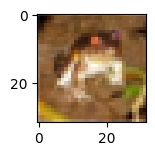

In [ ]:
#mostrar algumas imagens do dataset
plt.figure()
for i in range(9):
    #cria um grafico de 3 x 3
    plt.subplot(3,3,i+1)
    #mostra a imagem
    plt.imshow(x_train[i])
    #mostra o rotulo
    plt.ylabel(category_dict[y_train[i]]) # Fixed: removed extra [0] index
plt.show()

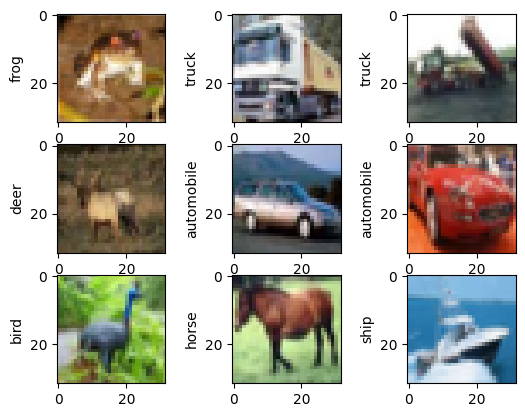

In [ ]:
#mostrar algumas imagens do dataset
plt.figure()
for i in range(9):
    #cria um grafico de 3 x 3
    plt.subplot(3,3,i+1)
    #mostra a imagem
    plt.imshow(x_train[i])
    #mostra o rotulo
    plt.ylabel(category_dict[y_train[i][0]]) # Access the integer label value
plt.show()

In [ ]:
#normalização dos pixels
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
#criação da rede neural
def CNN_classification_model(input_size = x_train.shape[1:]):
#cria modelo
model = Sequential()
#adiciona camada convolucional de entrada
model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
#define função de ativação
model.add(Activation('relu'))

IndentationError: expected an indented block after function definition on line 2 (<ipython-input-8-f64ea35627b7>, line 4)

In [ ]:
#criação da rede neural
def CNN_classification_model(input_size = x_train.shape[1:]):
    #cria modelo
    model = Sequential()
    #adiciona camada convolucional de entrada
    model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
    #define função de ativação
    model.add(Activation('relu'))
    # Add more layers or operations here, indented within the function

In [ ]:
#primeiro bloco
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))

NameError: name 'model' is not defined

In [ ]:
#criação da rede neural
def CNN_classification_model(input_size = x_train.shape[1:]):
    #cria modelo
    model = Sequential()
    #adiciona camada convolucional de entrada
    model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
    #define função de ativação
    model.add(Activation('relu'))

    #primeiro bloco
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))


In [ ]:
#segundo bloco
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

NameError: name 'model' is not defined

In [ ]:
#criação da rede neural
def CNN_classification_model(input_size = (32, 32, 3)): # Assuming an input size if x_train is not available
    #cria modelo
    model = Sequential()
    #adiciona camada convolucional de entrada
    model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
    #define função de ativação
    model.add(Activation('relu'))

    #primeiro bloco
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=1))

    #segundo bloco
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    return model # Return the model

# Create an instance of the model
my_model = CNN_classification_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#camada diretamente conectada (flatten/dense) e de saída
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
#usando otimizador adam com taxa padrão de aprendizagem
opt = keras.optimizers.Adam(learning_rate=0.0001)
#cria o modelo usa crossentropia e acurácia para avaliar
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile()
return model

NameError: name 'model' is not defined

In [ ]:
#criação da rede neural
def CNN_classification_model(input_size = (32, 32, 3)): # Assuming an input size if x_train is not available
    #cria modelo
    model = Sequential()
    #adiciona camada convolucional de entrada
    model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
    #define função de ativação
    model.add(Activation('relu'))

    #primeiro bloco
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=1))

    #segundo bloco
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    #camada diretamente conectada (flatten/dense) e de saída
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    #usando otimizador adam com taxa padrão de aprendizagem
    opt = keras.optimizers.Adam(learning_rate=0.0001)

    #cria o modelo usa crossentropia e acurácia para avaliar
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile()

    return model # Return the model

# Create an instance of the model
my_model = CNN_classification_model()

In [ ]:
#cria modelo da CNN
model=CNN_classification_model()
#mostra como a CNN ficou
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,451,434 (5.54 MB)

 Trainable params: 1,451,434 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#carrega os avaliadores do cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=final_cifar10.h5

In [ ]:
#carrega os avaliadores do cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.keras" # Change the extension to .keras
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

In [ ]:
#carrega os modelos pre-treinados
trained_weights_path = 'cifar10_weights.h5'
import numpy as np
import os
if os.path.exists(trained_weights_path):
model.load_weights(trained_weights_path, by_name=True)

IndentationError: expected an indented block after 'if' statement on line 5 (<ipython-input-20-f02e3e86ffd6>, line 6)

In [ ]:
#carrega os modelos pre-treinados
trained_weights_path = 'cifar10_weights.h5'
import numpy as np
import os
if os.path.exists(trained_weights_path):
    # Indent this line to be part of the if block
    model.load_weights(trained_weights_path, by_name=True)

In [ ]:
#treina o modelo
model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, verbose=1, callbacks=model_checkpoint)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2714 - loss: 2.0018
Epoch 1: loss improved from inf to 1.80847, saving model to final_cifar10.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.2716 - loss: 2.0013
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4523 - loss: 1.5178
Epoch 2: loss improved from 1.80847 to 1.46791, saving model to final_cifar10.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 0.4523 - loss: 1.5177
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5187 - loss: 1.3465
Epoch 3: loss improved from 1.46791 to 1.33043, saving model to final_cifar10.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.5188 - loss: 1.3464
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5590 - loss: 1.2428
Epoch 4: loss improved from 1.33043 to 1.23428, saving model to final_cifar10.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.5591 - loss: 1.2428
Epoch 5/10
391/391 ━━━━━

In [ ]:
#avaliação do modelo
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'final_cifar10.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
#avaliação do modelo
new_model = CNN_classification_model()
# Load the weights from the correct file
new_model.load_weights('final_cifar10.keras') # Change the file name to match the saved file
model.evaluate(x_test, y_test, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.6691 - loss: 0.9426


[0.9571043252944946, 0.6657999753952026]

In [ ]:
#predição
new_model.predict(x_test[0:1])
array([[0.02945358, 0.00262657, 0.03743106, 0.57616407, 0.01837392,
0.18481584, 0.08907659, 0.01865468, 0.03369198, 0.00971168]],
dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


NameError: name 'array' is not defined

In [ ]:
#predição
predictions = new_model.predict(x_test[0:1])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[1.7628798e-02 3.5082831e-04 3.5296690e-02 6.2266040e-01 9.6861590e-03
  2.6913145e-01 1.5757421e-02 5.4849349e-03 2.3229655e-02 7.7366940e-04]]


In [ ]:
#outra forma de ver a predição se o comando acima der algum erro
np.argmax(new_model.predict(x_test[0:1]), axis=-1)
array([3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


NameError: name 'array' is not defined

In [ ]:
#outra forma de ver a predição se o comando acima der algum erro
import numpy as np # Import the numpy library
np.argmax(new_model.predict(x_test[0:1]), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([3])

In [ ]:
# lista de rotulos preditos
pred_list = []
plt.figure()
for i in range(0,4):
plt.subplot(2,2, i+1)
#plota

IndentationError: expected an indented block after 'for' statement on line 4 (<ipython-input-24-58d6ce85dbbb>, line 5)

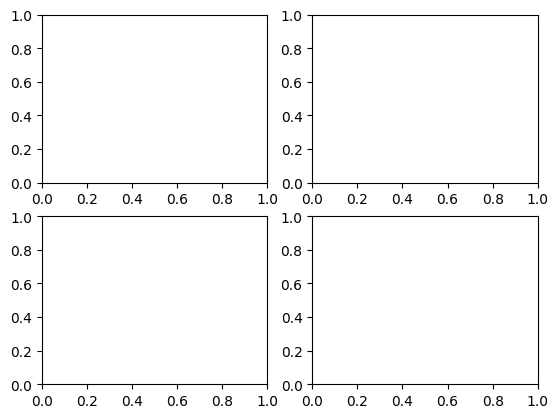

In [ ]:
# lista de rotulos preditos
pred_list = []
plt.figure()
for i in range(0,4):
    plt.subplot(2,2, i+1) # Indent this line to include it in the loop
    #plota

In [ ]:
# lista de rotulos preditos
pred_list = []
plt.figure()
for i in range(0,4):
plt.subplot(2,2, i+1)
#plota
plt.imshow(x_test[i])
#prediz
#pred = new_model.predict(x_test[0:10])
#outra forma de predicao se a acima nao funcionar
pred = np.argmax(new_model.predict(x_test[0:10]), axis=-1)
pred_list.append(pred)
#mostra os rotulos da imagens e as predições
x = category_dict[pred[i]]
y = category_dict[y_test[i][0]]
plt.title("predito:" + x + " correto:" + y)
plt.axis('off')
plt.show()

IndentationError: expected an indented block after 'for' statement on line 4 (<ipython-input-26-abf27f1854d7>, line 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


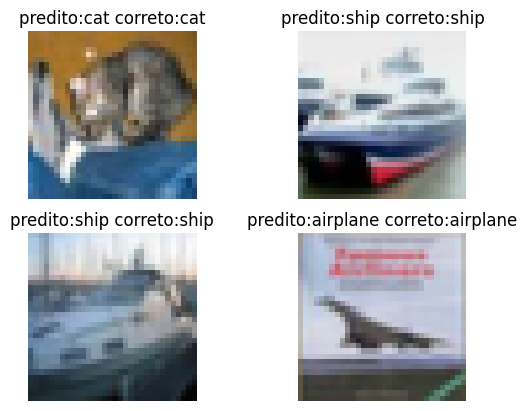

In [ ]:
# lista de rotulos preditos
pred_list = []
plt.figure()
for i in range(0,4):
    plt.subplot(2,2, i+1) # Indent this line to include it in the loop
    #plota
    plt.imshow(x_test[i])
    #prediz
    #pred = new_model.predict(x_test[0:10])
    #outra forma de predicao se a acima nao funcionar
    pred = np.argmax(new_model.predict(x_test[0:10]), axis=-1)
    pred_list.append(pred)
    #mostra os rotulos da imagens e as predições
    x = category_dict[pred[i]]
    y = category_dict[y_test[i][0]]
    plt.title("predito:" + x + " correto:" + y)
    plt.axis('off')
plt.show()